### File Number and Digical Readings

In [1]:
import numpy as np
import random
import sympy as sp
import csv
from matplotlib import pyplot as plt
from matplotlib import axes

import pandas as pd
DigiCal_vals = np.transpose(np.array(pd.read_excel("PT100vals.xlsx")))
print(DigiCal_vals)

[[ 1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.
  13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.
  25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.
  37.   38.   39.   40.   41.   42.   43.   44.  ]
 [15.04 20.05 25.05 30.03 35.05 40.05 45.05 50.03 55.04 60.03 65.03 65.03
  60.03 55.04 50.04 45.04 40.04 35.05 30.04 25.05 20.05 15.03 15.03 20.05
  25.05 30.05 35.05 40.04 45.05 50.04 55.04 60.03 65.03 65.03 60.03 55.04
  50.05 45.05 40.05 35.05 30.04 25.05 20.05 15.05]]


### Digical vs Average of 200 Values for Each PT100 Temperature reading

In [2]:
theoretical_temps = DigiCal_vals[1]
array = DigiCal_vals[0]
PT100_inlet = []
PT100_outlet= []
for i in array:
    i = int(i)
    PT_100_i = np.array(pd.read_table("{}.txt".format(i)))[:200,75]
    PT_100_i_avg = np.mean(PT_100_i)
    PT100_inlet.append(PT_100_i_avg)
    PT_100_o = np.array(pd.read_table("{}.txt".format(i)))[:200,76]
    PT_100_o_avg = np.mean(PT_100_o)
    PT100_outlet.append(PT_100_o_avg)

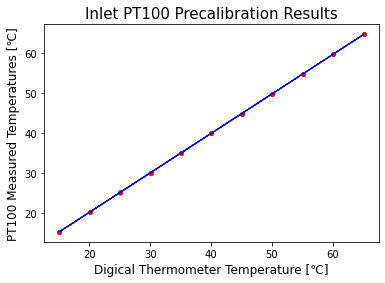

m inlet = 0.9908373802343359 ;  c inlet = 0.2942543581515781


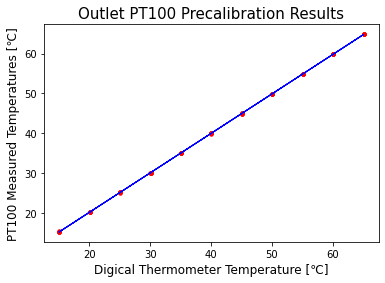

m outlet = 0.9878359665716272 ;  c outlet = 0.5179385816684551


In [5]:
m_inlet,c_inlet = np.polyfit(theoretical_temps,PT100_inlet,1) #1st degree ie. straight line
plt.plot(theoretical_temps,(theoretical_temps*m_inlet)+ c_inlet,linewidth=1,color="blue")

plt.scatter(theoretical_temps,PT100_inlet,s=12,c="red")
plt.ylabel("PT100 Measured Temperatures [\u2103]",fontsize=12)
plt.xlabel("Digical Thermometer Temperature [\u2103]",fontsize=12)
plt.title("Inlet PT100 Precalibration Results",fontsize=15)
plt.savefig('INLET pt100.svg', format='svg', dpi=1200)
plt.show()
print("m inlet =",m_inlet,";  c inlet =",c_inlet)

m_outlet,c_outlet = np.polyfit(theoretical_temps,PT100_outlet,1)
plt.plot(theoretical_temps,(theoretical_temps*m_outlet)+ c_outlet,linewidth=1,color="blue")

plt.scatter(theoretical_temps,PT100_outlet,s=12,c="red")
plt.ylabel("PT100 Measured Temperatures [\u2103]",fontsize=12)
plt.xlabel("Digical Thermometer Temperature [\u2103]",fontsize=12)
plt.title("Outlet PT100 Precalibration Results",fontsize=15)
plt.savefig('OUTLET pt100.svg', format='svg', dpi=1200)
plt.show()
print("m outlet =",m_outlet,";  c outlet =",c_outlet)

### Uncertainty of PT100 Probe

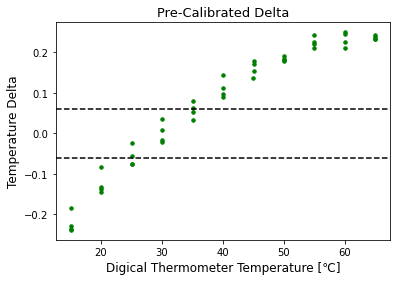

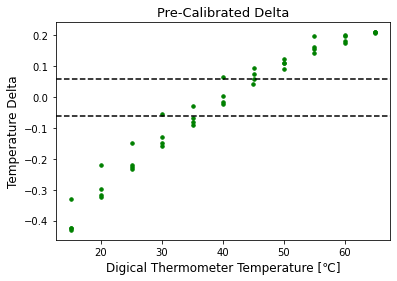

In [45]:
del_T_inlet = np.zeros(len(PT100_inlet))
del_T_outlet = np.zeros(len(PT100_outlet))

for i in range(0, len(PT100_inlet),1):
    del_T_inlet[i] = theoretical_temps[i]-PT100_inlet[i]
    del_T_outlet[i] = theoretical_temps[i]-PT100_outlet[i]


plt.scatter(theoretical_temps,del_T_inlet,s=12,c="green")
plt.axhline(y=0.06,xmin=0,xmax=1,linestyle='dashed',c="k")
plt.axhline(y=-0.06,xmin=0,xmax=1,linestyle='dashed',c='k')
plt.xlabel("Digical Thermometer Temperature [\u2103]",fontsize=12)
plt.ylabel("Temperature Delta", fontsize =12)
plt.title('Pre-Calibrated Delta',fontsize=13)
plt.show()

plt.scatter(theoretical_temps,del_T_outlet,s=12,c="green")
plt.axhline(y=0.06,xmin=0,xmax=1,linestyle='dashed',c="k")
plt.axhline(y=-0.06,xmin=0,xmax=1,linestyle='dashed',c='k')
plt.xlabel("Digical Thermometer Temperature [\u2103]",fontsize=12)
plt.ylabel("Temperature Delta", fontsize =12)
plt.title('Pre-Calibrated Delta',fontsize=13)
plt.show()

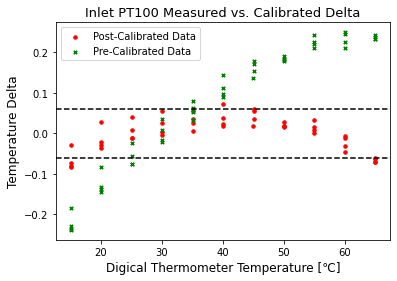

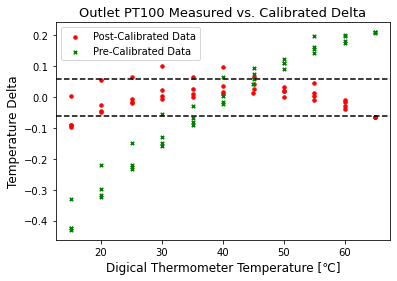

In [43]:
PT100_inlet_cal = np.zeros(len(PT100_inlet))
del_T_inlet_cal = np.zeros(len(PT100_inlet))

PT100_outlet_cal = np.zeros(len(PT100_outlet))
del_T_outlet_cal = np.zeros(len(PT100_outlet))

for i in range(0, len(PT100_inlet),1):
    PT100_inlet_cal[i] = (PT100_inlet[i]-c_inlet)/m_inlet
    del_T_inlet_cal[i] = theoretical_temps[i]-PT100_inlet_cal[i]
    
    PT100_outlet_cal[i] = (PT100_outlet[i]-c_outlet)/m_outlet
    del_T_outlet_cal[i] = theoretical_temps[i]-PT100_outlet_cal[i]
        
plt.scatter(theoretical_temps,del_T_inlet_cal,s=12,c="red",label="Post-Calibrated Data")
plt.scatter(theoretical_temps,del_T_inlet,s=12,c="green",marker="x",label="Pre-Calibrated Data")
plt.axhline(y=0.06,xmin=0,xmax=1,linestyle='dashed',c="k")
plt.axhline(y=-0.06,xmin=0,xmax=1,linestyle='dashed',c='k')
plt.xlabel("Digical Thermometer Temperature [\u2103]",fontsize=12)
plt.ylabel("Temperature Delta", fontsize =12)
plt.title('Inlet PT100 Measured vs. Calibrated Delta',fontsize=13)
plt.legend()
plt.show()

plt.scatter(theoretical_temps,del_T_outlet_cal,s=12,c="red",label="Post-Calibrated Data")
plt.scatter(theoretical_temps,del_T_outlet,s=12,c="green",marker="x",label="Pre-Calibrated Data")
plt.axhline(y=0.06,xmin=0,xmax=1,linestyle='dashed',c="k")
plt.axhline(y=-0.06,xmin=0,xmax=1,linestyle='dashed',c='k')
plt.xlabel("Digical Thermometer Temperature [\u2103]",fontsize=12)
plt.ylabel("Temperature Delta", fontsize =12)
plt.title('Outlet PT100 Measured vs. Calibrated Delta',fontsize=13)
plt.legend()
plt.show()